<a href="https://colab.research.google.com/github/Pa8l0/Challenge-Python-Alura/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
tienda1_ingresos = tienda['Precio'].sum()
tienda2_ingresos = tienda2['Precio'].sum()
tienda3_ingresos = tienda3['Precio'].sum()
tienda4_ingresos = tienda4['Precio'].sum()

print(f"Ingresos totales Tienda 1: {tienda1_ingresos}")
print(f"Ingresos totales Tienda 2: {tienda2_ingresos}")
print(f"Ingresos totales Tienda 3: {tienda3_ingresos}")
print(f"Ingresos totales Tienda 4: {tienda4_ingresos}")

Ingresos totales Tienda 1: 1150880400.0
Ingresos totales Tienda 2: 1116343500.0
Ingresos totales Tienda 3: 1098019600.0
Ingresos totales Tienda 4: 1038375700.0


# 2. Ventas por categoría

,Tienda,Categoría del Producto,Cantidad Vendida
7,tienda1,Muebles,465
3,tienda1,Electrónicos,448
5,tienda1,Juguetes,324
2,tienda1,Electrodomésticos,312
1,tienda1,Deportes y diversión,284
4,tienda1,Instrumentos musicales,182
6,tienda1,Libros,173
0,tienda1,Artículos para el hogar,171
15,tienda2,Muebles,442
11,tienda2,Electrónicos,422


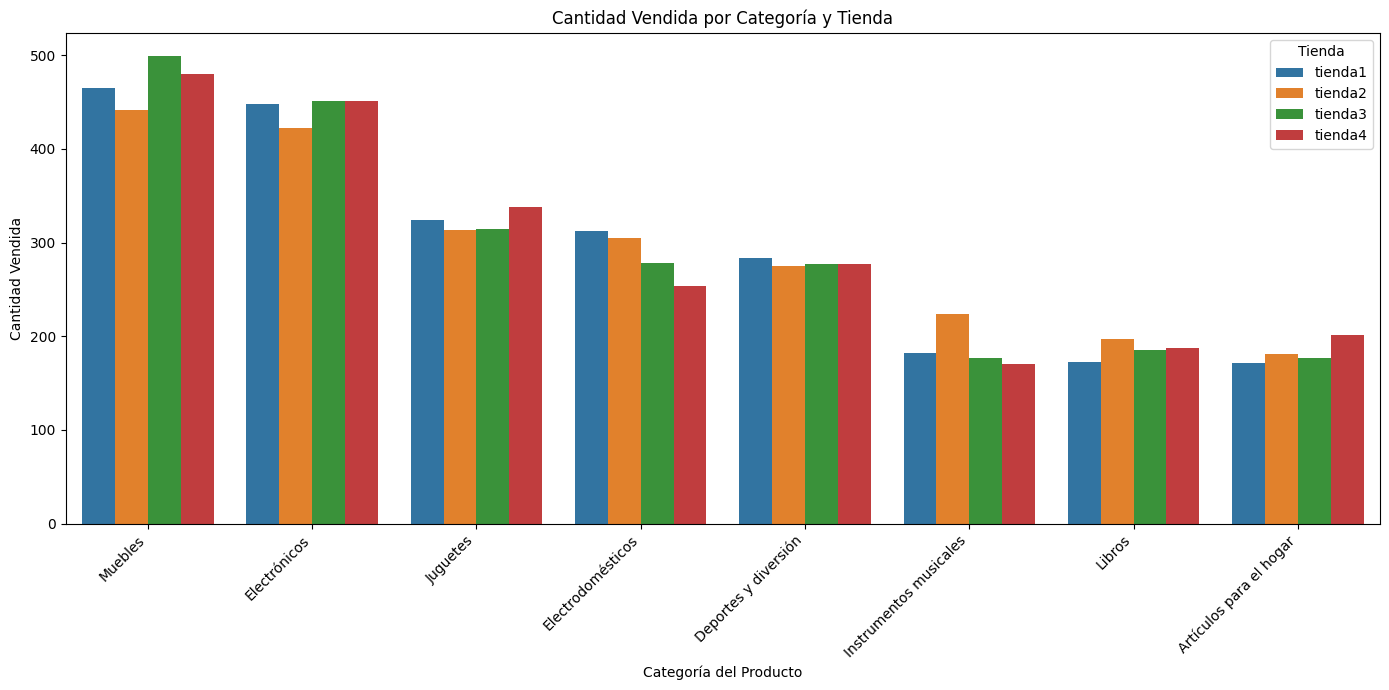

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tienda['Tienda'] = 'tienda1'
tienda2['Tienda'] = 'tienda2'
tienda3['Tienda'] = 'tienda3'
tienda4['Tienda'] = 'tienda4'

todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

ventas_por_tienda_categoria = todas_las_tiendas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

ventas_por_tienda_categoria_ordenado = ventas_por_tienda_categoria.sort_values(by=['Tienda', 'Cantidad Vendida'], ascending=[True, False])

display(ventas_por_tienda_categoria_ordenado)

plt.figure(figsize=(14, 7))
sns.barplot(x='Categoría del Producto', y='Cantidad Vendida', hue='Tienda', data=ventas_por_tienda_categoria_ordenado)
plt.title('Cantidad Vendida por Categoría y Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
calificacion_promedio_por_tienda = todas_las_tiendas.groupby('Tienda')['Calificación'].mean()

calificacion_promedio_por_tienda

,Calificación
Tienda,
tienda1,3.976685
tienda2,4.037304
tienda3,4.048326
tienda4,3.995759


# 4. Productos más y menos vendidos

,Tienda,Producto,Cantidad Vendida
0,tienda1,Ajedrez de madera,49
1,tienda1,Armario,60
2,tienda1,Asistente virtual,40
3,tienda1,Auriculares,50
4,tienda1,Auriculares con micrófono,33


Productos más vendidos por tienda:


,Tienda,Producto,Cantidad Vendida
1,tienda1,Armario,60
75,tienda2,Iniciando en programación,65
129,tienda3,Kit de bancas,57
163,tienda4,Cama box,62



Productos menos vendidos por tienda:


,Tienda,Producto,Cantidad Vendida
4,tienda1,Auriculares con micrófono,33
77,tienda2,Juego de mesa,32
111,tienda3,Bloques de construcción,35
175,tienda4,Guitarra eléctrica,33


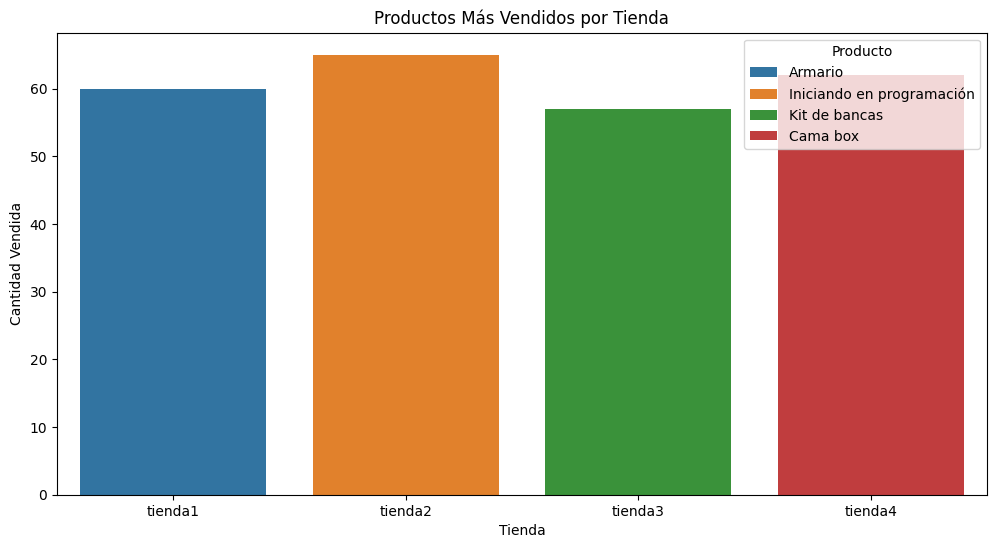

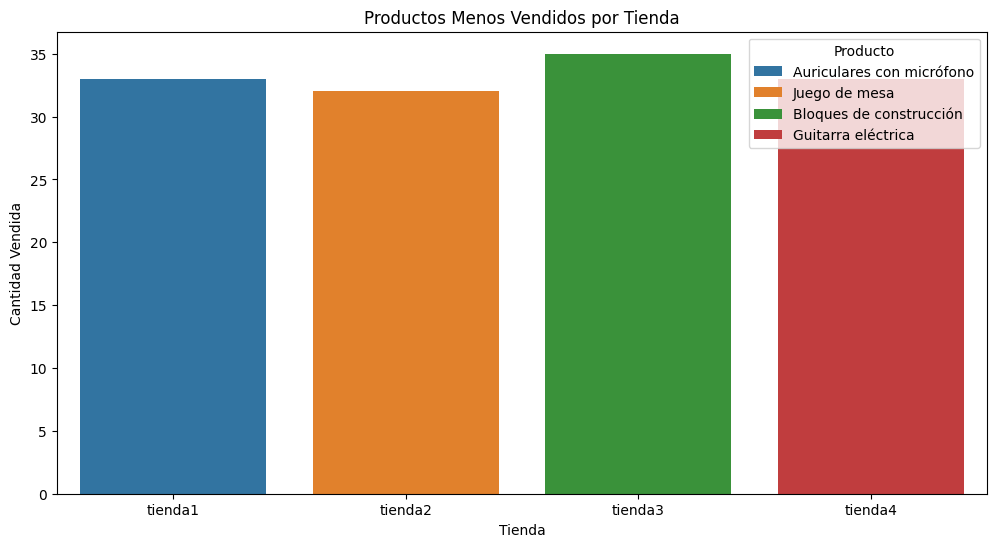

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ventas_por_tienda_producto = todas_las_tiendas.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad Vendida')

display(ventas_por_tienda_producto.head())

productos_mas_vendidos_por_tienda = ventas_por_tienda_producto.loc[ventas_por_tienda_producto.groupby('Tienda')['Cantidad Vendida'].idxmax()]

print("Productos más vendidos por tienda:")
display(productos_mas_vendidos_por_tienda)

productos_menos_vendidos_por_tienda = ventas_por_tienda_producto.loc[ventas_por_tienda_producto.groupby('Tienda')['Cantidad Vendida'].idxmin()]

print("\nProductos menos vendidos por tienda:")
display(productos_menos_vendidos_por_tienda)

plt.figure(figsize=(12, 6))
sns.barplot(x='Tienda', y='Cantidad Vendida', hue='Producto', data=productos_mas_vendidos_por_tienda)
plt.title('Productos Más Vendidos por Tienda')
plt.ylabel('Cantidad Vendida')
plt.xlabel('Tienda')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Tienda', y='Cantidad Vendida', hue='Producto', data=productos_menos_vendidos_por_tienda)
plt.title('Productos Menos Vendidos por Tienda')
plt.ylabel('Cantidad Vendida')
plt.xlabel('Tienda')
plt.show()

# 5. Envío promedio por tienda

,Costo de envío
Tienda,
tienda1,26018.609580
tienda2,25216.235693
tienda3,24805.680373
tienda4,23459.457167


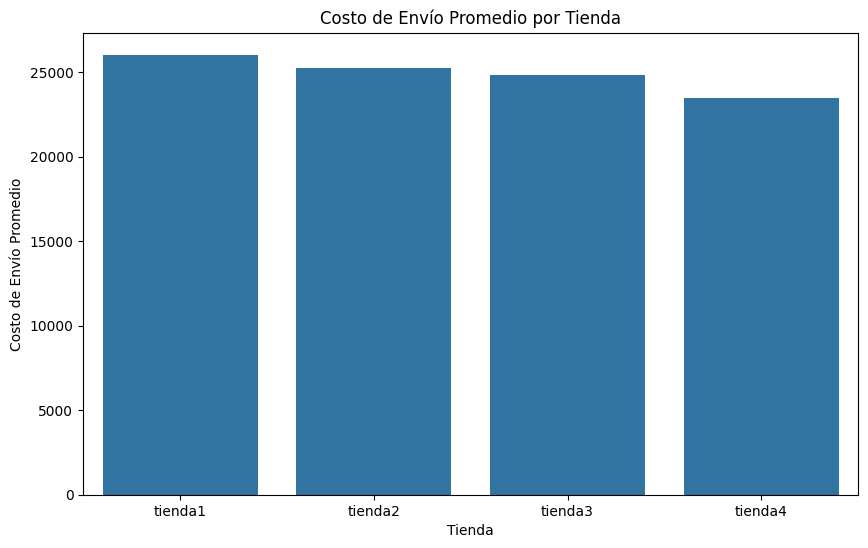

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

costo_envio_promedio_por_tienda = todas_las_tiendas.groupby('Tienda')['Costo de envío'].mean()

display(costo_envio_promedio_por_tienda)

plt.figure(figsize=(10, 6))
sns.barplot(x=costo_envio_promedio_por_tienda.index, y=costo_envio_promedio_por_tienda.values)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.show()

# 6. Análisis textual

Informe de Análisis de Tiendas

El propósito de este análisis es evaluar el desempeño de cuatro tiendas diferentes, utilizando datos de ventas, calificaciones de clientes y costos de envío, con el fin de determinar cuál sería la tienda más recomendable para que el Sr. Juan enfoque sus esfuerzos de venta.

Según el análisis de ingresos totales, la Tienda 1 generó la mayor cantidad de ingresos, seguida por la Tienda 2, la Tienda 3 y la Tienda 4. Esto sugiere que la Tienda 1 tiene un mayor volumen de ventas o precios más altos en general.

Al analizar las ventas por categoría de producto, observamos que "Muebles" y "Electrónicos" son consistentemente las categorías más vendidas en todas las tiendas. Las categorías menos vendidas varían, pero "Artículos para el hogar" e "Instrumentos musicales" tienden a tener un rendimiento inferior en comparación con otras categorías. Esto indica oportunidades para optimizar el inventario o las estrategias de marketing para las categorías de bajo rendimiento.

El análisis de la calificación promedio de los clientes revela que todas las tiendas tienen calificaciones relativamente altas, oscilando alrededor de 4 sobre 5. La Tienda 3 tiene la calificación promedio ligeramente más alta, seguida por la Tienda 2. Aunque las diferencias son mínimas, una calificación más alta puede indicar una mayor satisfacción del cliente.

Respecto a los productos más y menos vendidos, se identificaron productos específicos que tienen un rendimiento excepcional o deficiente en cada tienda. Por ejemplo, en la Tienda 1, "Armario" fue el producto más vendido, mientras que en la Tienda 2 fue "Iniciando en programación". Identificar estos productos permite capitalizar el éxito de los más vendidos y abordar las razones del bajo rendimiento de los menos vendidos.

Finalmente, al examinar el costo de envío promedio por tienda, se observa que la Tienda 4 tiene el costo de envío promedio más bajo, mientras que la Tienda 1 tiene el más alto. Los costos de envío pueden influir en la decisión de compra de los clientes, por lo que un costo de envío más bajo podría ser una ventaja competitiva.

Considerando los factores analizados, se recomienda que el Sr. Juan se enfoque en la Tienda 1. Aunque tiene el costo de envío promedio más alto, sus ingresos totales son los más elevados, lo que sugiere una fuerte base de clientes y un rendimiento general superior. Además, las categorías más vendidas ("Muebles" y "Electrónicos") tienen un buen desempeño en esta tienda, y el producto más vendido ("Armario") demuestra un éxito particular. Si bien la Tienda 3 tiene la calificación promedio más alta, la diferencia es marginal y no compensa la brecha en los ingresos. La Tienda 4, a pesar de tener el costo de envío más bajo, presenta los ingresos totales más bajos. Por lo tanto, la Tienda 1 ofrece el mayor potencial de negocio para el Sr. Juan, aunque se podría considerar estrategias para optimizar los costos de envío.